# Tiktok Project 

In [1]:
import pandas as pd 
import numpy as np
import datetime as dt 

import matplotlib.pyplot as plt
import seaborn as sns 

from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

In [2]:
data = pd.read_csv('tiktok_dataset.csv')
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


## EDA
### **Scenario**

I am a member of the TikTok data team
Orion Rainier, a Data Scientist at TikTok, has requested assistance with Exploratory Data Analysis (EDA) and data visualization. The tasks include:

* Show data structuring and cleaning.
* Create matplotlib/seaborn visualizations.
* Include a graph comparing claim counts to opinion counts.
* Plot boxplots for key variables (video duration, like count, comment count, view count).
* Breakdown of "author ban status" counts.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [4]:
data['#'] = data['#'].astype(str)
data['video_id'] = data['video_id'].astype(str)

In [5]:
missing_values = round(data.isnull().sum()/len(data),2)*100
missing_values

#                           0.0
claim_status                2.0
video_id                    0.0
video_duration_sec          0.0
video_transcription_text    2.0
verified_status             0.0
author_ban_status           0.0
video_view_count            2.0
video_like_count            2.0
video_share_count           2.0
video_download_count        2.0
video_comment_count         2.0
dtype: float64

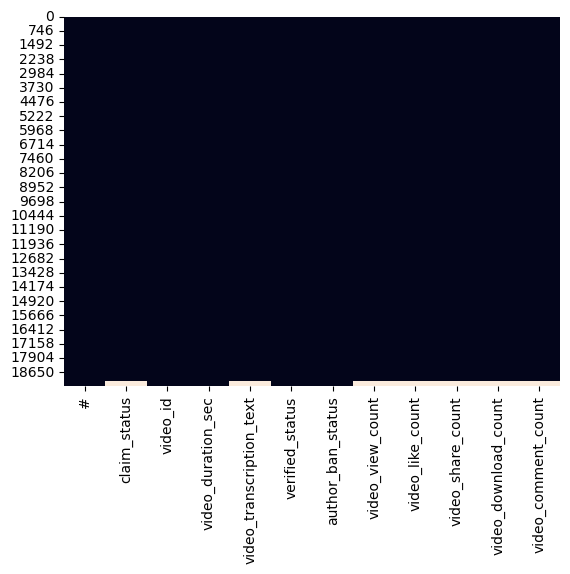

In [6]:
sns.heatmap(data.isna(), cbar=False)
plt.show()

In [7]:
data.size

232584

In [8]:
data = data.dropna(axis = 0)
data.size

229008

In [9]:
data.describe()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


#### Video duration (sec)

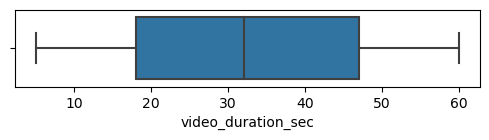

In [10]:
fig = plt.figure(figsize = (6,1))
sns.boxplot(x = data['video_duration_sec'])
plt.show()

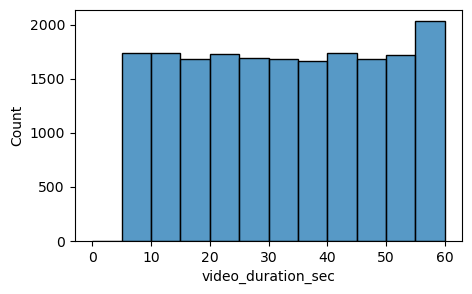

In [11]:
fig = plt.figure(figsize = (5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.show()

All videos are about 5-60 seconds in length. The distribution is uniform.

#### Video view count

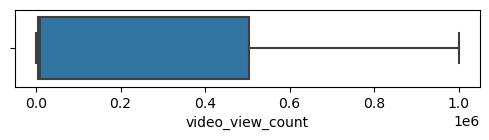

In [12]:
fig = plt.figure(figsize = (6,1))
sns.boxplot(x = data['video_view_count'])
plt.show()

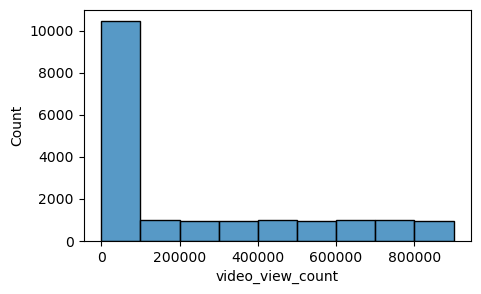

In [13]:
fig = plt.figure(figsize = (5,3))
sns.histplot(data['video_view_count'], bins = range(0, 10**6, 10**5))
plt.show()

This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

#### Video like count

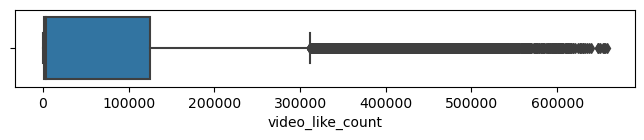

In [14]:
fig = plt.figure(figsize = (8,1))
sns.boxplot(x = data['video_like_count'])
plt.show()

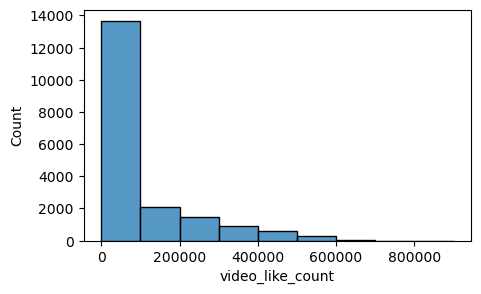

In [15]:
fig = plt.figure(figsize = (5,3))
sns.histplot(data['video_like_count'], bins = range(0, 10**6, 10**5))
plt.show()

Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count

#### Video share count

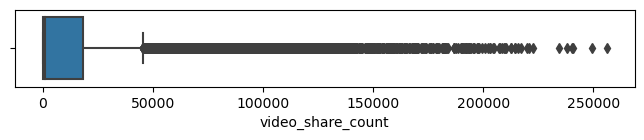

In [16]:
fig = plt.figure(figsize = (8,1))
sns.boxplot(x = data['video_share_count'])
plt.show()

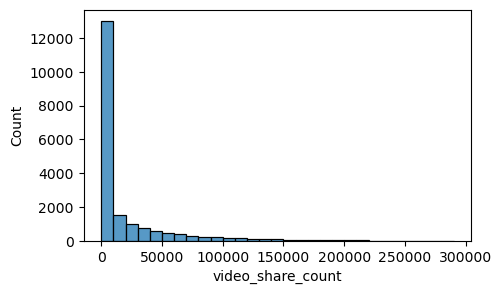

In [17]:
fig = plt.figure(figsize = (5,3))
sns.histplot(data['video_share_count'], bins = range(0, 300000, 10000))
plt.show()

The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

#### Video comment count 

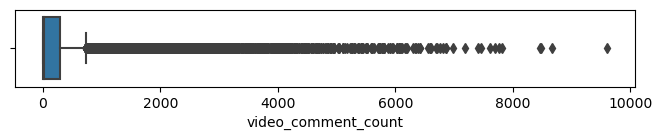

In [18]:
fig = plt.figure(figsize = (8,1))
sns.boxplot(x = data['video_comment_count'])
plt.show()

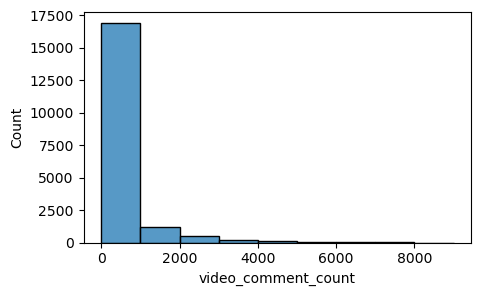

In [19]:
fig = plt.figure(figsize = (5,3))
sns.histplot(data['video_comment_count'], bins = range(0, 10000, 1000))
plt.show()

#### Video download count

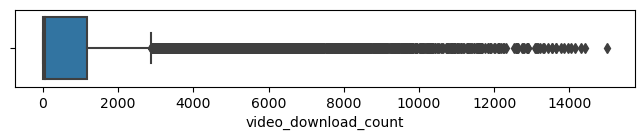

In [20]:
fig = plt.figure(figsize = (8,1))
sns.boxplot(x = data['video_download_count'])
plt.show()

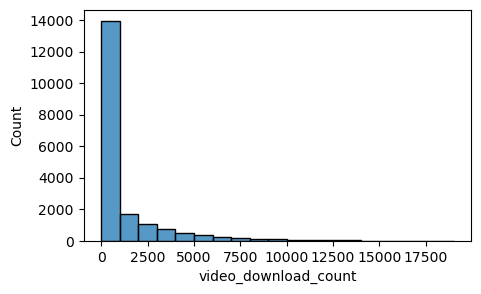

In [21]:
fig = plt.figure(figsize = (5,3))
sns.histplot(data['video_download_count'], bins = range(0, 20000, 1000))
plt.show()

The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

#### Claim status by verification status 

In [22]:
data['author_ban_status'].value_counts().sort_index()

active          15383
banned           1635
under review     2066
Name: author_ban_status, dtype: int64

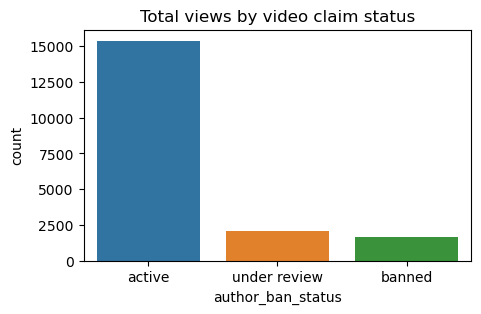

In [23]:
fig = plt.figure(figsize = (5,3))
order = ['active', 'under review', 'banned']
sns.countplot(data = data, x = 'author_ban_status', order = order)
plt.title('Total views by video claim status')
plt.show()

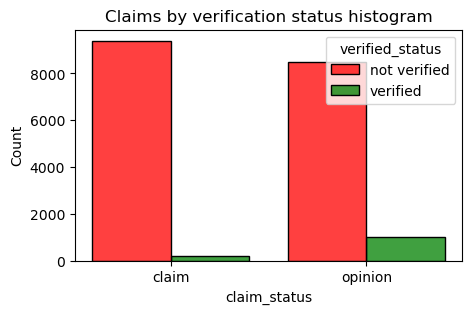

In [24]:
fig = plt.figure(figsize = (5,3))
colors = {'verified': 'green', 'not verified': 'red'}
sns.histplot(data= data, x='claim_status', hue='verified_status', multiple='dodge', shrink=0.8, palette=colors)
plt.title('Claims by verification status histogram')
plt.show()

There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.

#### Claims by verification status histogram

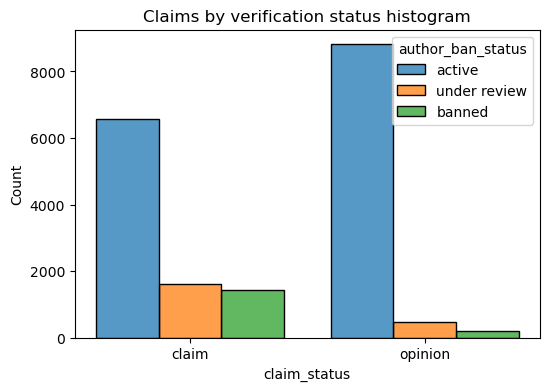

In [25]:
fig = plt.figure(figsize = (6,4))
order = ['active', 'under review', 'banned']
sns.histplot(data=data, x='claim_status', hue='author_ban_status', hue_order = order, multiple='dodge', shrink=0.8)
plt.title('Claims by verification status histogram')
plt.show()

Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

#### Median view count by ban status 

In [26]:
view_by_ban_status = data.groupby(['author_ban_status']).median()[['video_view_count']]
view_by_ban_status

C:\Users\AD\AppData\Local\Temp\ipykernel_4924\2538500707.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  view_by_ban_status = data.groupby(['author_ban_status']).median()[['video_view_count']]


,video_view_count
author_ban_status,
active,8616.0
banned,448201.0
under review,365245.5


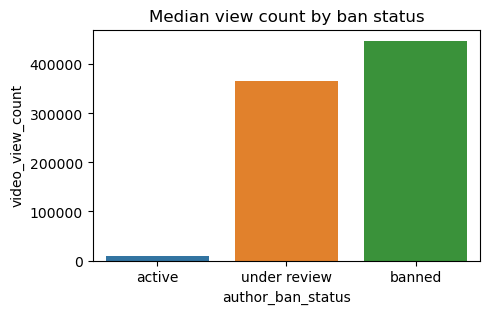

In [27]:
fig = plt.figure(figsize = (5,3))
order = ['active', 'under review', 'banned']
sns.barplot(data= view_by_ban_status, x = view_by_ban_status.index, y = 'video_view_count', order = order)
plt.title('Median view count by ban status')
plt.show()

The median view counts for non-active authors are many times greater than the median view count for active authors. Since you know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.

In [28]:
view_by_claim = data.groupby(['claim_status'])['video_view_count'].mean()
view_by_claim

claim_status
claim      501029.452748
opinion      4956.432250
Name: video_view_count, dtype: float64

#### Determine outliers

In [29]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers of {column}:', outlier_count)

Number of outliers of video_view_count: 2343
Number of outliers of video_like_count: 3468
Number of outliers of video_share_count: 3732
Number of outliers of video_download_count: 3733
Number of outliers of video_comment_count: 3882


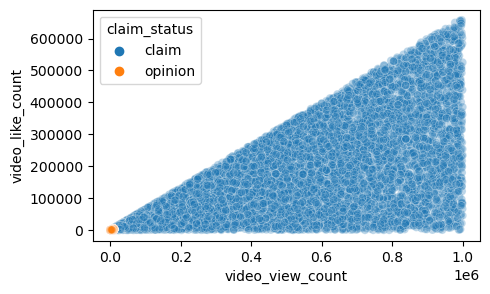

In [30]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
fig = plt.figure(figsize = (5,3))
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],hue=data["claim_status"], alpha=.3)
plt.show()

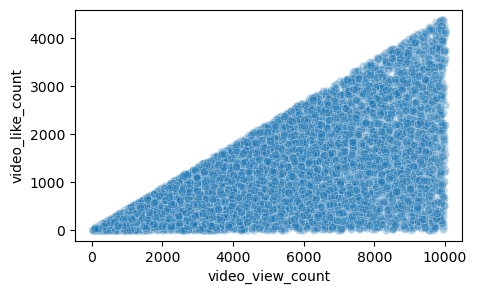

In [31]:
# Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only
fig = plt.figure(figsize = (5,3))
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"], alpha=.3)
plt.show()

## Hypothesis testing 
**Scenario**

Now, I have received a new assignment from Orion Rainier:

* Identify the necessary hypothesis tests for the TikTok classification project.
* Perform the hypothesis tests and statistical analysis to validate assumptions and gain insights.
* Prepare a detailed report of the hypothesis tests and their results to inform the next steps in the project.

In [32]:
view_by_verified_status = data.groupby(['verified_status'])['video_view_count'].mean()
view_by_verified_status

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

*   **Null hypothesis**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).
*    **Alternative hypothesis**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

My goal in this step is to conduct a two-sample t-test. These are steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis


**$H_0$**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

**$H_A$**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

I choose **5%** as the significance level and proceed with a two-sample t-test.

In [33]:
not_verified = data[data['verified_status'] == 'not verified']['video_view_count']
verified = data[data['verified_status'] == 'verified']['video_view_count']

In [34]:
stats.ttest_ind(a = not_verified, b = verified, equal_var = False)

Ttest_indResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120)

Since the p-value is extremely small (much smaller than the significance level of 5%), you reject the null hypothesis.

**What business insight(s) can you draw from the result of your hypothesis test?** 

The analysis shows that there is a statistically significant difference in the average view counts between videos from verified accounts and videos from unverified accounts. This suggests there might be fundamental behavioral differences between these two groups of accounts.

It would be interesting to investigate the root cause of this behavioral difference. For example, do unverified accounts tend to post more clickbait-y videos? Or are unverified accounts associated with spam bots that help inflate view counts?

## Modelling
**Scenario**

To explore this further, I have been tasked with building a logistic regression model using `verified_status` as the outcome variable. The results will help in constructing the final model to predict whether a video is a claim or an opinion.

**My Tasks:**
* Build a Logistic Regression Model using the claims classification dataset to predict `verified_status` based on specific variables (number of followers, likes, comments, shares, length of video, hashtags used, video category).

* Evaluate the Model, including a confusion matrix and accuracy score to assess the model's performance.

* Summarize the key findings of the analysis.

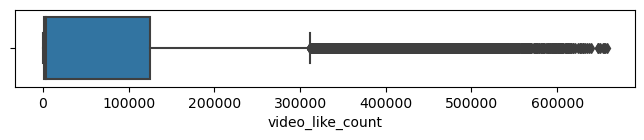

In [35]:
fig = plt.figure(figsize = (8,1))
sns.boxplot(x = data['video_like_count'])
plt.show()

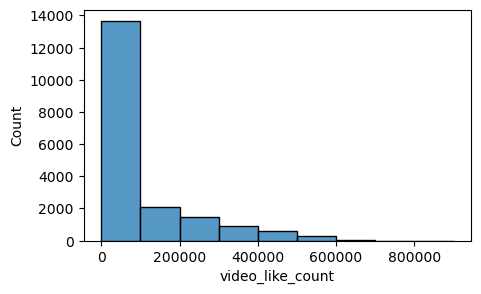

In [36]:
fig = plt.figure(figsize = (5,3))
sns.histplot(data['video_like_count'], bins = range(0, 10**6, 10**5))
plt.show()

In [37]:
count_cols = ['video_comment_count',
              'video_like_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr

    data.loc[data[column] > upper_limit, column] = upper_limit

In [38]:
# check balance
data['verified_status'].value_counts()/len(data)*100

not verified    93.71201
verified         6.28799
Name: verified_status, dtype: float64

Approximately 93.7% of the dataset represents videos posted by unverified accounts and 6.3% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [39]:
# Identify data points from majority and minority classes
not_verified = data[data['verified_status'] == 'not verified']
verified = data[data['verified_status'] == 'verified']

# Upsample the minority class 
verified_upsampled = resample(verified,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(not_verified), # to match majority class
                                 random_state=0)               

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([not_verified, verified_upsampled]).reset_index(drop=True) 

data_upsampled['verified_status'].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.

In [40]:
data_upsampled[['video_transcription_text', 'verified_status']].groupby(['verified_status'])[['video_transcription_text']].agg(func = lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [41]:
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].apply(func=lambda text: len(text))

In [42]:
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


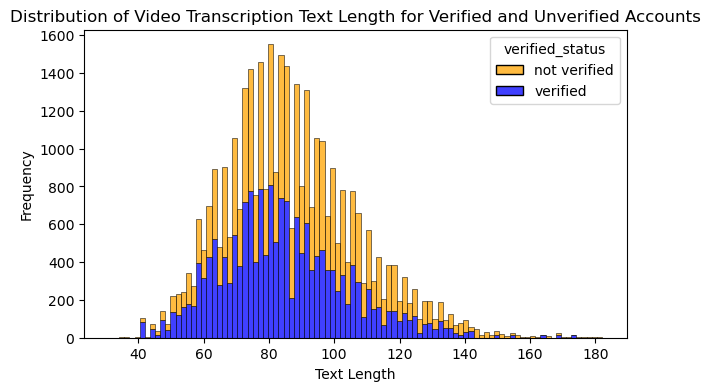

In [48]:
verified = data_upsampled[data_upsampled['verified_status'] == 'verified']
not_verified = data_upsampled[data_upsampled['verified_status'] == 'not verified']

fig = plt.figure(figsize=(7,4))

sns.histplot(data=data_upsampled
             , stat="count"
             , multiple="stack"
             , x="text_length"
             , element = 'bars'
             , hue = 'verified_status'
             , palette={"verified": "blue", "not verified": "orange"})

plt.title("Distribution of Video Transcription Text Length for Verified and Unverified Accounts")
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [49]:
correlation =  data_upsampled.corr()
correlation

C:\Users\AD\AppData\Local\Temp\ipykernel_4924\594077436.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =  data_upsampled.corr()


,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
video_duration_sec,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
text_length,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


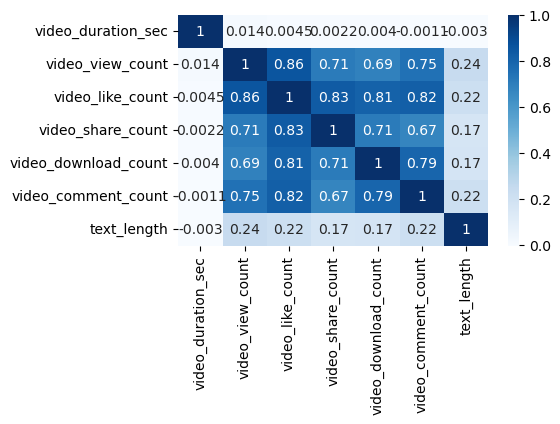

In [50]:
fig = plt.figure(figsize = (5,3))
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.show()

The above heatmap shows that the following pair of variables are strongly correlated: `video_view_count` and `video_like_count` (0.86 correlation coefficient).

One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, you could exclude `video_like_count`. And among the variables that quantify video metrics, you could keep `video_view_count`, `video_share_count`, `video_download_count`, and `video_comment_count` as features.

In [51]:
x = data_upsampled[['video_duration_sec', 'video_view_count', 'video_share_count', 'video_download_count', 'video_comment_count', 'claim_status', 'author_ban_status']]
y = data_upsampled['verified_status']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [93]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

In [94]:
x_train.dtypes

video_duration_sec        int64
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
claim_status             object
author_ban_status        object
dtype: object

In [95]:
x_train['claim_status'].value_counts()

opinion    17474
claim       9352
Name: claim_status, dtype: int64

In [96]:
x_train['author_ban_status'].value_counts()

active          22773
under review     2386
banned           1667
Name: author_ban_status, dtype: int64

In [97]:
x_train_dummies = pd.get_dummies(x_train, columns=['claim_status', 'author_ban_status'], drop_first = True)

* `claim_status_claim` = 1, it is a claim 
* `claim_status_claim` = 0, it is an opinion 

* `author_ban_status_active` = 1, the account is active 
* `author_ban_status_banned` = 1, the account is banned
* `author_ban_status_active` = 0 and `author_ban_status_banned` = 0, the account is under review

In [98]:
x_train_dummies

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
28075,52,7612.0,105.0,1.0,0.0,1,0,0
28358,23,9303.0,593.0,49.0,13.0,1,0,0
27086,11,366577.0,40248.0,1486.0,598.0,0,0,0
7104,43,176311.0,22270.0,1546.0,557.0,0,0,0
25784,24,4320.0,194.0,23.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...
16850,59,5871.0,390.0,3.0,1.0,1,0,0
6265,57,838700.0,1520.0,2236.0,728.5,0,0,0
11284,51,3329.0,348.0,1.0,0.0,1,0,0
860,38,264141.0,36885.0,3034.0,728.5,0,1,0


In [99]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [100]:
y_train_final

array([1., 1., 1., ..., 0., 0., 0.])

In [101]:
clf = LogisticRegression(random_state=42).fit(x_train_dummies, y_train_final)

**Results**

In [102]:
x_test_dummies = pd.get_dummies(x_test, columns=['claim_status', 'author_ban_status'], drop_first = True)

In [103]:
y_test_final = y_encoder.fit_transform(y_test.values.reshape(-1, 1)).ravel()

In [104]:
y_pred = clf.predict(x_test_dummies)

In [105]:
y_pred

array([1., 0., 1., ..., 1., 1., 1.])

In [106]:
x_train_dummies.shape, y_train_final.shape, x_test_dummies.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

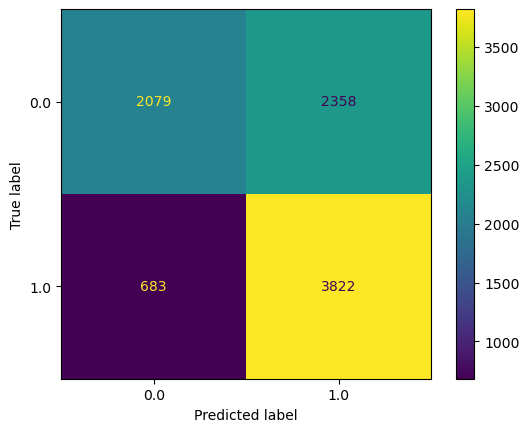

In [107]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=clf.classes_)
log_disp.plot()

plt.show()

The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [108]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.75      0.47      0.58      4437
not verified       0.62      0.85      0.72      4505

    accuracy                           0.66      8942
   macro avg       0.69      0.66      0.65      8942
weighted avg       0.69      0.66      0.65      8942



The classification report above shows that the logistic regression model achieved a precision of 61% and a recall of 84%, and it achieved an accuracy of 65%. Note that the precision and recall scores are taken from the "not verified" row of the output because that is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

In [110]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
pd.DataFrame(data={"Feature Name":clf.feature_names_in_, "Model Coefficient":clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.008421
1,video_view_count,-0.000002
2,video_share_count,0.000007
3,video_download_count,-0.000033
4,video_comment_count,-0.000520
5,claim_status_opinion,0.000382
6,author_ban_status_banned,-0.000019
7,author_ban_status_under review,0.000001


**Key takeaways:**

- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.
- The logistic regression model had not great, but acceptable predictive power: a precision of 61% is less than ideal, but a recall of 84% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable. 


We developed a logistic regression model for verified status based on video features. The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.